## Defining instrument_detector

In [2]:
import os
import librosa
import numpy as np
from pathlib import Path
import subprocess

In [4]:
# Use the full path (adjust for your username)
ailh_bass = "/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Passenger_And_I_Love_Her_(Official_Video)/bass.wav"
ailh_vocals = "/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Passenger_And_I_Love_Her_(Official_Video)/vocals.wav"
dm_bass = "/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Dil_Mere/bass.wav"

In [44]:
ailh_bass, sr = librosa.load(ailh_bass)
ailh_vocals, sr = librosa.load(ailh_vocals)
dm_bass, sr = librosa.load(dm_bass)

In [45]:
librosa.onset.onset_detect(y=ailh_bass, sr=22050, units='time')

array([6.96598639e-02, 1.23065760e+00, 1.50929705e+00, 1.62539683e+00,
       1.81115646e+00, 2.02013605e+00, 2.36843537e+00, 2.71673469e+00,
       2.87927438e+00, 3.20435374e+00, 3.41333333e+00, 3.71519274e+00,
       3.92417234e+00, 4.04027211e+00, 4.38857143e+00, 4.76009070e+00,
       5.10839002e+00, 5.57278912e+00, 5.78176871e+00, 5.89786848e+00,
       6.40870748e+00, 6.73378685e+00, 6.94276644e+00, 7.05886621e+00,
       7.40716553e+00, 7.73224490e+00, 8.24308390e+00, 8.54494331e+00,
       9.05578231e+00, 9.24154195e+00, 9.40408163e+00, 9.72916100e+00,
       1.00542404e+01, 1.04025397e+01, 1.08901587e+01, 1.10991383e+01,
       1.12152381e+01, 1.17492971e+01, 1.21208163e+01, 1.22369161e+01,
       1.25852154e+01, 1.27941950e+01, 1.31192744e+01, 1.34675737e+01,
       1.36068934e+01, 1.37926531e+01, 1.39319728e+01, 1.41177324e+01,
       1.44195918e+01, 1.46285714e+01, 1.47678912e+01, 1.50929705e+01,
       1.54412698e+01, 1.57895692e+01, 1.61146485e+01, 1.62539683e+01,
      

In [46]:
librosa.onset.onset_detect(y=dm_bass, sr=22050, units='time')

array([ 64.22639456,  64.87655329,  65.4338322 ,  66.82702948,
        67.87192744,  68.10412698,  69.40444444,  70.03138322,
        70.61188209,  71.98185941,  73.25895692,  74.55927438,
        75.20943311,  76.50975057,  77.1599093 ,  77.78684807,
        78.27446712,  78.46022676,  79.06394558,  79.62122449,
        79.73732426,  80.38748299,  81.03764172,  81.6645805 ,
        82.31473923,  82.941678  ,  83.45251701,  83.61505669,
        84.24199546,  84.8921542 ,  85.54231293,  86.19247166,
        87.1444898 ,  87.44634921,  88.44480726,  88.72344671,
        89.60580499,  89.74512472,  90.04698413,  90.65070295,
        91.34730159,  92.29931973,  92.62439909,  93.50675737,
        93.85505669,  93.9014966 ,  95.20181406,  95.85197279,
        96.50213152,  97.15229025,  97.45414966,  97.6399093 ,
        97.80244898,  98.75446712,  99.07954649, 100.03156463,
       100.35664399, 101.03002268, 101.65696145, 102.49287982,
       102.60897959, 102.93405896, 103.60743764, 103.90

In [47]:
librosa.onset.onset_detect(y=ailh_vocals, sr=22050, units='time')

array([ 23.4521542 ,  23.89333333,  23.9629932 ,  24.10231293,
        24.52027211,  24.84535147,  24.9846712 ,  25.33297052,
        26.74938776,  26.9815873 ,  27.77106576,  28.30512472,
        30.16272109,  30.30204082,  30.44136054,  30.62712018,
        30.95219955,  31.18439909,  31.230839  ,  31.60235828,
        32.15963719,  32.34539683,  32.76335601,  32.9723356 ,
        33.2277551 ,  33.85469388,  34.11011338,  34.34231293,
        35.80517007,  36.17668934,  36.38566893,  36.64108844,
        36.89650794,  37.05904762,  37.2215873 ,  38.68444444,
        38.84698413,  38.98630385,  39.03274376,  39.26494331,
        39.63646259,  39.9847619 ,  40.26340136,  40.42594104,
        40.79746032,  41.67981859,  41.7262585 ,  42.4460771 ,
        42.74793651,  47.55446712,  47.92598639,  48.20462585,
        48.59936508,  48.78512472,  48.9476644 ,  49.13342404,
        50.64272109,  50.99102041,  51.10712018,  51.61795918,
        51.80371882,  53.93995465,  54.14893424,  54.42

In [48]:
print(len(ailh_bass)/sr)
print(len(ailh_vocals)/sr)
print(len(dm_bass)/sr)

164.96621315192743
164.96621315192743
260.73687074829934


In [49]:
print(np.mean(librosa.feature.rms(y=ailh_bass)[0]))
print(np.mean(librosa.feature.rms(y=ailh_vocals)[0]))
print(np.mean(librosa.feature.rms(y=dm_bass)[0]))


6.236887e-05
0.037982818
0.042678505


In [ ]:
def detect_instrument_presence(stem_audio, sr=22050):
    
    """Simple energy-based detection"""
    
    # Average loudness/energy
    mean_rms_energy = np.mean(librosa.feature.rms(y=stem_audio)[0])
    
    # Threshold (tune this!)
    energy_threshold = 0.0001  # Adjust based on your data
    
    return 1 if mean_rms_energy > energy_threshold else 0

## Database Generation

In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect('song_database.db')

In [6]:
# Instantiates the database

def create_tables(conn):
    cursor = conn.cursor()
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS songs (
        song_id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT NOT NULL,
        artist TEXT,
        duration REAL,
        vocals BOOLEAN,
        bass BOOLEAN,
        drums BOOLEAN,
        others BOOLEAN
    )
    ''')
    conn.commit()

def insert_song(conn, title, artist, duration, vocals, bass, drums, others):
    cursor = conn.cursor()
    cursor.execute('''
    INSERT INTO songs (title, artist, duration, vocals, bass, drums, others)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (title, artist, duration, vocals, bass, drums, others))
    conn.commit()
    return cursor.lastrowid  # Returns the song_id

def fetch_all_songs(conn):
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM songs')
    return cursor.fetchall()

I could add a BLOB here, if need be? idk if i wanna store that in my database though bcs I don't want a huge database with all the audio files. The info from them is less storage

In [12]:
!pip install -U demucs

  Using cached demucs-4.0.1-py3-none-any.whl
  Using cached dora_search-0.1.12-py3-none-any.whl
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached julius-0.2.7-py3-none-any.whl
  Using cached lameenc-1.8.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.9 kB)
  Using cached openunmix-1.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached torch-2.7.1-cp313-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached torchaudio-2.7.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0

In [24]:
create_tables(conn)
"/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Passenger_And_I_Love_Her_(Official_Video)/vocals.wav"

def separate_stems(parent_folder):
    for song_file in Path(parent_folder).glob("*.mp3"):
        # y, sr = librosa.load(song_file)
        # duration = librosa.get_duration(y=y, sr=sr)
        
        command = [
                "demucs",
                "-n", "htdemucs",
                "-o", str(parent_folder), # maybe add a /trying or some subfolder here
                str(song_file)
            ]
        
        subprocess.run(command, check=True)


In [27]:
separate_stems("/Users/vanshc/Desktop/Songs/trial")

Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /Users/vanshc/Desktop/Songs/trial/htdemucs
Separating track /Users/vanshc/Desktop/Songs/trial/YuraSoop - Summer Funky Groove.mp3


100%|██████████████████████████████████████████████| 140.39999999999998/140.39999999999998 [01:16<00:00,  1.83seconds/s]


In [88]:
detect_basic_info("/Users/vanshc/Desktop/Songs/trial/htdemucs/YuraSoop - Summer Funky Groove")

('Summer Funky Groove', 'YuraSoop', 136.54204081632653)

In [34]:
def detect_basic_info(song_folder):
    artist, title = os.path.basename(song_folder).split(" - ", 1)
    sample = librosa.load(song_folder / 'vocals.wav', sr=22050)
    duration = librosa.get_duration(y=sample, sr=22050)

    return title.strip(), artist.strip(), duration

In [86]:
def detect_instrument_presence_stem(stem_audio, sr=22050):
    
    # Average loudness/energy
    mean_rms_energy = np.mean(librosa.feature.rms(y=stem_audio)[0])
    
    # Threshold (tune this!)
    energy_threshold = 0.0001  # Adjust based on your data
    
    return 1 if mean_rms_energy > energy_threshold else 0


def detect_instrument_presence_song(song_folder):

    stem_files = {}
    for audio_file in song_folder.glob("*.wav"):
        stem_name = audio_file.stem  
        stem_files[stem_name] = audio_file # bass.wav: file_path

    expected_stems = ['vocals', 'drums', 'bass', 'other']
    results = {}
    
    # Check each expected stem
    for stem_name in expected_stems:
        if stem_name in stem_files:
            try:
                # Load the stem audio
                stem_audio, _ = librosa.load(stem_files[stem_name], sr=22050)
                
                # Run your detection method
                presence = detect_instrument_presence_stem(stem_audio)
                results[stem_name] = presence
                
            except Exception as e:
                print(f"  Error analyzing {stem_name}: {e}")
                results[stem_name] = 0
        else:
            print(f"  Warning: {stem_name}.wav not found")
            results[stem_name] = 0
    
    return results['vocals'], results['drums'], results['bass'], results['other']


In [89]:
conn = sqlite3.connect('song_database.db')
create_tables(conn)

vocals, drums, bass, other = detect_instrument_presence_song(Path("/Users/vanshc/Desktop/Songs/trial/htdemucs/YuraSoop - Summer Funky Groove"))
title, artist, duration = detect_basic_info(Path("/Users/vanshc/Desktop/Songs/trial/htdemucs/YuraSoop - Summer Funky Groove"))
insert_song(conn, title, artist, duration, vocals, bass, drums, other)

1

In [38]:
import IPython.display as ipd

other, sr = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Kevin MacLeod - Hustle/other.wav")
vocals, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Kevin MacLeod - Hustle/vocals.wav")

ipd.Audio(other, rate = sr)

<Axes: >

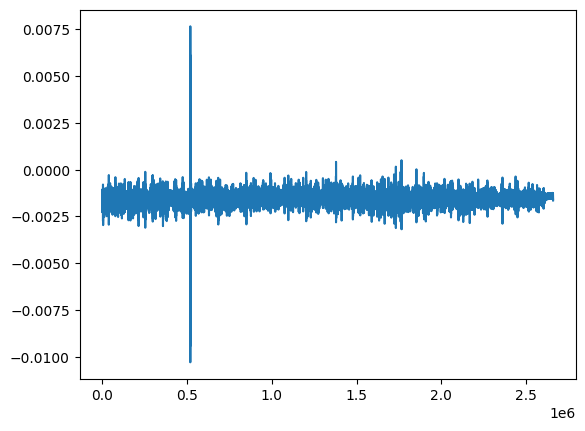

In [46]:
import pandas as pd

pd.Series(vocals).plot()

Testing the method is_song_already_processed(conn, file)

In [47]:
print(np.mean(librosa.feature.rms(y=vocals)[0]))
print(np.mean(librosa.feature.rms(y=other)[0]))


0.0015814038
0.050200347


In [69]:
drums, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/drums.wav")
bass, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/bass.wav")
other, sr = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/other.wav")
vocals, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/vocals.wav")

In [49]:
print(np.mean(librosa.feature.rms(y=vocals)[0]))
print(np.mean(librosa.feature.rms(y=other)[0]))
print(np.mean(librosa.feature.rms(y=drums)[0]))
print(np.mean(librosa.feature.rms(y=bass)[0]))

0.0032737516
0.15650524
0.003310549
0.003215011


In [56]:
if np.mean(librosa.feature.rms(y=drums)[0]) > 0.01:
    print(1)

In [76]:
import importlib
import extractor  # must import the whole module
importlib.reload(extractor)

from extractor import detect_instrument_presence_stem
detect_instrument_presence_stem(drums)

0

In [73]:
# Average loudness/energy
mean_rms_energy = np.mean(librosa.feature.rms(y=drums)[0])

# Threshold (tune this!)
energy_threshold = 0.01  # Adjust based on your data

if mean_rms_energy > energy_threshold:
    print(1) 
else:
    print(0)

print(mean_rms_energy)

0
0.003310549


In [77]:
print(detect_instrument_presence_stem(drums))
print(detect_instrument_presence_stem(bass))
print(detect_instrument_presence_stem(other))
print(detect_instrument_presence_stem(vocals))

0
0
1
0


In [ ]:
parent_folder = "/Users/vanshc/Desktop/Songs"

conn = sqlite3.connect('song_database.db')

create_tables(conn)

for song_file in Path(parent_folder).glob("*.mp3"):
    is_song_already_processed(conn, song_file)

In [9]:
for song_file in Path("/Users/vanshc/Desktop/Songs").glob("*.mp3"):
    print(song_file.name)
    

Ketsa - Jazz for the Solstice.mp3
Beat Mekanik - Flirty.mp3
State Shirt - Computer.mp3
Double-F the King - Awware.mp3
YuraSoop - Summer Funky Groove.mp3
Jon Shuemaker - I Am Not Your Victim.mp3
